In [1]:
import konlpy

In [2]:
import nltk

In [3]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

In [4]:
font_path = "C:/Windows/Fonts/MALGUN.TTF"
font_name = fm.FontProperties(fname=font_path).get_name()
plt.rc('font', family=font_name)
plt.rc('xtick', labelsize=10)
mpl.rcParams['axes.unicode_minus'] = False

In [6]:
import numpy as np

data = np.random.randint(-200, 100, 50).cumsum()
data

array([   19,    93,   100,   -71,   -43,  -217,  -135,  -156,  -227,
        -401,  -565,  -676,  -696,  -794,  -838, -1008, -1094, -1232,
       -1250, -1164, -1191, -1222, -1127, -1266, -1293, -1231, -1180,
       -1131, -1165, -1323, -1420, -1592, -1688, -1793, -1971, -1916,
       -1870, -1948, -2069, -2194, -2201, -2155, -2118, -2260, -2184,
       -2153, -2270, -2375, -2503, -2604], dtype=int32)

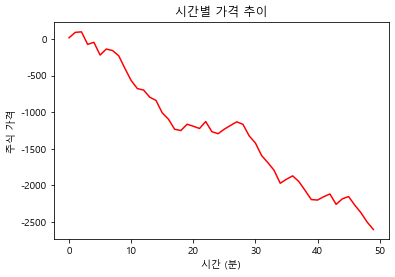

In [7]:
# 그래프를 그려보자. 이번에는 정상

plt.plot(range(50), data, 'r')
plt.title("시간별 가격 추이")
plt.ylabel("주식 가격")
plt.xlabel("시간 (분)")
plt.style.use("seaborn-pastel")
plt.show()

In [8]:
from konlpy.tag import Kkma

k = Kkma()
k.sentences("안녕하세요! 오늘은 한글 분석을 시작합니다.")

['안녕하세요!', '오늘은 한글 분석을 시작합니다.']

In [9]:
k.nouns("안녕하세요! 오늘은 한글 분석을 시작합니다.")

['안녕', '오늘', '한글', '분석']

In [10]:
# 형태소 분석

k.pos("안녕하세요! 오늘은 한글 분석을 시작합니다.")

[('안녕', 'NNG'),
 ('하', 'XSV'),
 ('세요', 'EFN'),
 ('!', 'SF'),
 ('오늘', 'NNG'),
 ('은', 'JX'),
 ('한글', 'NNG'),
 ('분석', 'NNG'),
 ('을', 'JKO'),
 ('시작하', 'VV'),
 ('ㅂ니다', 'EFN'),
 ('.', 'SF')]

In [11]:
from konlpy.tag import Hannanum

hannanum = Hannanum()
hannanum.pos("아버지가방에 들어가신다")

[('아버지가방', 'N'), ('에', 'J'), ('들', 'P'), ('어', 'E'), ('가', 'P'), ('시ㄴ다', 'E')]

In [12]:
k = Kkma()
k.pos("아버지가방에 들어가신다")

[('아버지', 'NNG'),
 ('가방', 'NNG'),
 ('에', 'JKM'),
 ('들어가', 'VV'),
 ('시', 'EPH'),
 ('ㄴ다', 'EFN')]

In [13]:
from konlpy.tag import Komoran

k = Komoran()
k.pos("아버지가방에 들어가신다")

[('아버지', 'NNG'),
 ('가방', 'NNP'),
 ('에', 'JKB'),
 ('들어가', 'VV'),
 ('시', 'EP'),
 ('ㄴ다', 'EC')]

In [16]:
from konlpy.tag import Okt

okt = Okt()
okt.pos("아버지가방에 들어가신다")

[('아버지', 'Noun'), ('가방', 'Noun'), ('에', 'Josa'), ('들어가신다', 'Verb')]

In [17]:
from wordcloud import WordCloud, STOPWORDS
from PIL import Image

In [18]:
import platform

In [22]:
text = open("alice.txt").read()
text

'癤풮roject Gutenberg\'s Alice\'s Adventures in Wonderland, by Lewis Carroll\n\nThis eBook is for the use of anyone anywhere at no cost and with\nalmost no restrictions whatsoever.  You may copy it, give it away or\nre-use it under the terms of the Project Gutenberg License included\nwith this eBook or online at www.gutenberg.org\n\n\nTitle: Alice\'s Adventures in Wonderland\n\nAuthor: Lewis Carroll\n\nPosting Date: June 25, 2008 [EBook #11]\nRelease Date: March, 1994\n[Last updated: December 20, 2011]\n\nLanguage: English\n\n\n*** START OF THIS PROJECT GUTENBERG EBOOK ALICE\'S ADVENTURES IN WONDERLAND ***\n\n\n\n\n\n\n\n\n\n\nALICE\'S ADVENTURES IN WONDERLAND\n\nLewis Carroll\n\nTHE MILLENNIUM FULCRUM EDITION 3.0\n\n\n\n\nCHAPTER I. Down the Rabbit-Hole\n\nAlice was beginning to get very tired of sitting by her sister on the\nbank, and of having nothing to do: once or twice she had peeped into the\nbook her sister was reading, but it had no pictures or conversations in\nit, \'and what i

In [24]:
print(type(STOPWORDS))
print(STOPWORDS)

<class 'set'>
{'such', 'below', 'themselves', "hasn't", 'here', "how's", "we'd", 'further', "shouldn't", "doesn't", 'at', 'therefore', "here's", "couldn't", 'having', 'it', 'if', 'some', 'who', 'of', 'where', 'has', "isn't", 'otherwise', 'them', 'yours', 'only', "they'll", 'www', 'few', "we've", 'in', 'an', 'our', 'that', 'as', 'into', "we'll", 'he', 'other', 'own', 'too', "where's", 'from', 'since', 'ought', 'which', 'also', "he'd", 'hers', 'all', 'him', 'its', 'on', 'through', 'yourselves', "haven't", 'were', "why's", 'above', 'up', 'herself', 'myself', 'can', 'shall', "won't", 'yourself', 'whom', 'his', 'cannot', "weren't", 'with', "what's", 'nor', 'theirs', 'like', 'however', 'me', 'does', 'under', 'http', 'been', "i'm", 'down', 'her', 'any', 'doing', "he'll", "they've", "wouldn't", 'very', "you'd", 'you', 'we', 'your', 'a', 'should', "who's", "you're", 'am', 'com', "aren't", 'during', 'same', 'than', 'their', 'both', 'and', 'not', 'these', 'between', 'against', 'do', 'once', "ther

In [25]:
s2 = set([1, 2, 3, 4, 5, 1, 2])
s2

{1, 2, 3, 4, 5}

In [27]:
print(len(STOPWORDS))
stopwords = set(STOPWORDS)
print(len(stopwords))

192
192


In [28]:
stopwords = set(STOPWORDS)
stopwords.add("said")
print(len(stopwords))

193


In [29]:
stopwords

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'all',
 'also',
 'am',
 'an',
 'and',
 'any',
 'are',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 "can't",
 'cannot',
 'com',
 'could',
 "couldn't",
 'did',
 "didn't",
 'do',
 'does',
 "doesn't",
 'doing',
 "don't",
 'down',
 'during',
 'each',
 'else',
 'ever',
 'few',
 'for',
 'from',
 'further',
 'get',
 'had',
 "hadn't",
 'has',
 "hasn't",
 'have',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'hence',
 'her',
 'here',
 "here's",
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 "how's",
 'however',
 'http',
 'i',
 "i'd",
 "i'll",
 "i'm",
 "i've",
 'if',
 'in',
 'into',
 'is',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'k',
 "let's",
 'like',
 'me',
 'more',
 'most',
 "mustn't",
 'my',
 'myself',
 'no',
 'nor',
 'not',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'otherwise',
 'ought',
 'our',
 

In [30]:
alice_mask = np.array(Image.open("alice_color.png"))
alice_mask[0]

array([[255, 255, 255, 255],
       [255, 255, 255, 255],
       [255, 255, 255, 255],
       ...,
       [255, 255, 255, 255],
       [255, 255, 255, 255],
       [255, 255, 255, 255]], dtype=uint8)

In [31]:
wc = WordCloud(background_color="white",
               max_words=2000,
               mask=alice_mask,
               contour_width=3,
               contour_color="steelblue")
wc.generate(text)
wc.words_

{'said': 1.0,
 'Alice': 0.7225433526011561,
 'said Alice': 0.3352601156069364,
 'little': 0.31213872832369943,
 'one': 0.29190751445086704,
 'know': 0.26011560693641617,
 'went': 0.2398843930635838,
 'thing': 0.23121387283236994,
 'time': 0.22254335260115607,
 'Queen': 0.21965317919075145,
 'see': 0.1936416184971098,
 'King': 0.18497109826589594,
 'well': 0.18208092485549132,
 'now': 0.17341040462427745,
 'head': 0.17341040462427745,
 'began': 0.1676300578034682,
 'way': 0.16473988439306358,
 'Hatter': 0.16473988439306358,
 'Mock Turtle': 0.16184971098265896,
 'say': 0.15895953757225434,
 'Gryphon': 0.15895953757225434,
 'think': 0.1531791907514451,
 'quite': 0.15028901734104047,
 'much': 0.14739884393063585,
 'first': 0.14739884393063585,
 'thought': 0.14450867052023122,
 'go': 0.14450867052023122,
 'come': 0.13872832369942195,
 'never': 0.13583815028901733,
 'voice': 0.1329479768786127,
 'looked': 0.13005780346820808,
 'got': 0.13005780346820808,
 'must': 0.12716763005780346,
 'Cat':

In [32]:
len(wc.words_)

2000

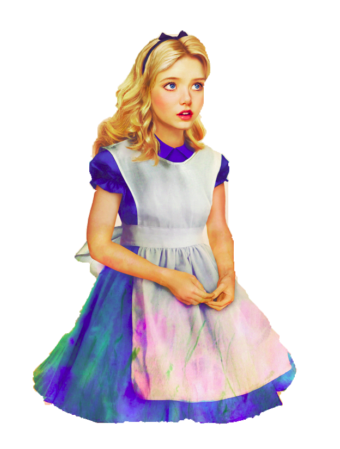

In [36]:
plt.figure(figsize=(15, 8))
plt.imshow(alice_mask, cmap=plt.cm.gray, interpolation="bilinear")
plt.axis("off")
plt.show()

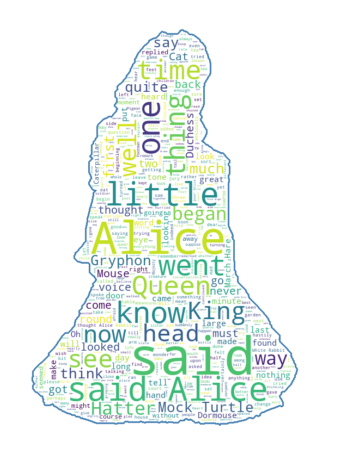

In [34]:
plt.figure(figsize=(15, 8))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()

In [39]:
doc_ko = open("15_TheExtreme_utf8.txt", encoding="utf-8").read()
doc_ko[1:1000]

'"x"\n"1" " 분노의 질주 시리즈중에서 제일 별루"\n"2" " 스케일 큰 시끄러운 액션이 난무하는데도 이렇게까지 지루할수 있다니....."\n"3" " 시~원 하게 잘 본 영화. 다음 시리즈에서는 여자 주인공의 비중이 더 높아졌으면 하는 바램!"\n"4" " 반지닦기, 자살닦이, 고무닦이, 정의닦이...로 이어지는 한심한 DC 시리즈 \n레지던트 이블 시리즈 \n그리고 이 영화 분노의 질주 시리즈 \n공통점은 시리즈가 거듭될수록 돈은 많이 들지만 재미는 없어지고 \nCG는 떡질되지만 실감나는 장면은 더 없어지도 뻔히 가짜라는게 드러나는 영화들 \n그러나\n아무리 엉터리로 만들고, 자국에서 망해도 \n미국 블록버스터라면 맹목적으로 보는 중국애들 땜에 \n아무리 쓰레기 영화라도 본전 건지는 것은 물론 상당히 많은 돈을 버니... \n이런 쓰레기들이 매년 양산된다. \n물론, 중국애들도 할말은 있을 거다 \n공산당이 검열하는 자국영화보다는 낫다고... \n하지만 우리들은 다른 전세계의 재미있는 영화를 볼 선택의 자유가 있쟎아! \n왜 이런 쓰레기 영화를 보는 거지?"\n"5" " "\n"6" " 그냥 액션만 보면 멋진데\n스토리는 주인공이 전여친한테 싸지른\n애새끼 구하러 간다며 아빠행세하면서\n그 덕분에 지동료들 다 버리고 미쳐 날뛰는 내용"\n"7" " "\n"8" " 아래는 다들 평점 알바들인가부네.. 이런 개 쓰레기 영화가 평점이 이리 높다니"\n"9" " "\n"10" " "\n"11" " "\n"12" " "\n"13" " "\n"14" " "\n"15" " 스케일은 점점 더 커지지만, 액션은 멍청할정도로 어이가없음 과유불급"\n"16" " 이 시리즈로 이렇게 길게 간다는게 신기.. 새로울 건 없지만 달리는 걸 좋아하시는 분이라면 "\n"17" " "\n"18" " "\n"19" " "\n"20" " 대머리들은 TV물로 찍고,\n감독은 CG실에서 이어붙히고."\n"21" " "\n"22" " "\n"23" " "\n"24" " "\n"25" " 

In [41]:
from konlpy.tag import Okt

t = Okt()

doc_nouns = t.nouns(doc_ko)

print(len(doc_nouns))

4286


In [44]:
ko = nltk.Text(doc_nouns, name="분노의 질주")
print(type(ko))
print(len(ko.tokens))

<class 'nltk.text.Text'>
4286


In [46]:
type(ko.vocab())

nltk.probability.FreqDist

In [48]:
ko.vocab().most_common(20)

[('영화', 157),
 ('액션', 149),
 ('시리즈', 70),
 ('분노', 62),
 ('스토리', 57),
 ('질주', 55),
 ('최고', 44),
 ('자동차', 40),
 ('생각', 37),
 ('편', 37),
 ('더', 36),
 ('그냥', 33),
 ('역시', 32),
 ('좀', 31),
 ('폴', 31),
 ('워커', 30),
 ('그', 28),
 ('장면', 26),
 ('이', 25),
 ('것', 25)]

In [49]:
print(len(set(ko.tokens)))

1381


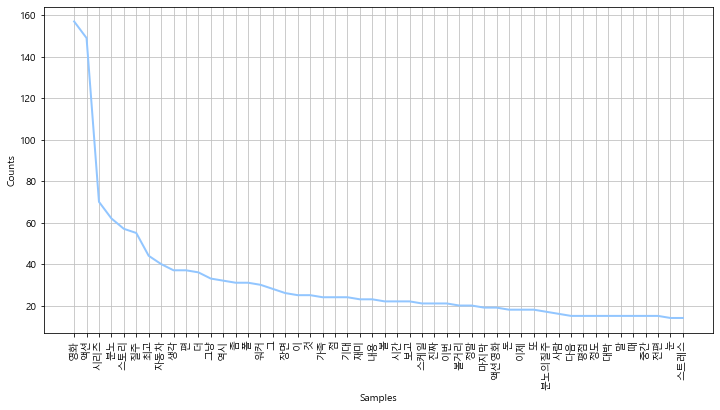

In [50]:
plt.figure(figsize=(12, 6))
ko.plot(50)
plt.show()

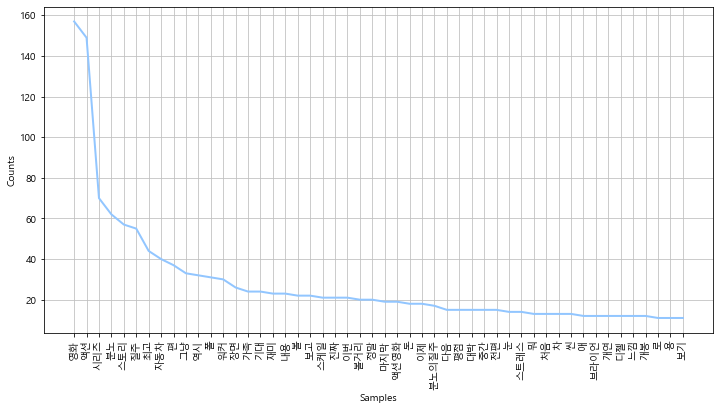

In [65]:
file = open("korean_stopwords_100.txt", 'r', encoding='utf-8')
lines = file.readlines()

my_stop_words = []

for line in lines:
    my_stop_words.append(line.split("\t")[0])


new_ko = []

for one_word in ko:
    if one_word not in my_stop_words:
        new_ko.append(one_word)

new_nltk_ko = nltk.Text(new_ko, name="분노의 질주2")
plt.figure(figsize=(12,6))
new_nltk_ko.plot(50)

In [75]:
new_nltk_ko.vocab()

FreqDist({'영화': 157, '액션': 149, '시리즈': 70, '분노': 62, '스토리': 57, '질주': 55, '최고': 44, '자동차': 40, '편': 37, '그냥': 33, ...})

In [76]:
import pandas as pd

In [99]:
movie_review = pd.read_csv("../naver_movie_review_web_crawling/콰이어트 플레이스 리뷰.csv", encoding='utf-8')

document = movie_review["review"]

okt = Okt()

document_nouns = []

for review in document:
    nouns = okt.nouns(review)
    for i in range(len(nouns)):
        document_nouns.append(nouns[i])

print(len(document_nouns))


2057


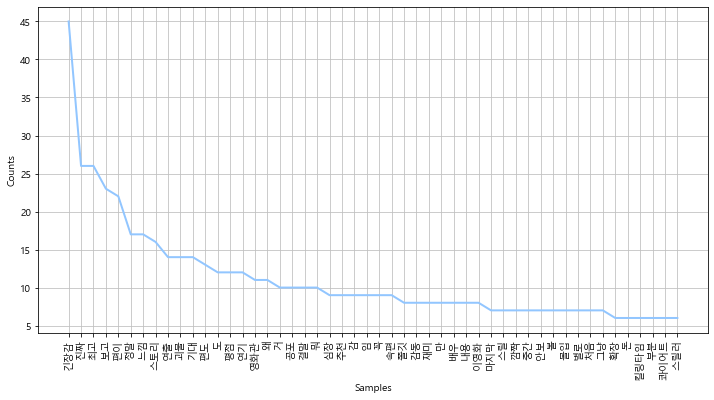

In [103]:
my_stop_words.append("편")
my_stop_words.append("영화")

quiet_place_nouns = []

for one_word in document_nouns:
    if one_word not in my_stop_words:
        quiet_place_nouns.append(one_word)

nltk_quiet_place = nltk.Text(quiet_place_nouns, name="콰이어트 플레이스 리뷰")
plt.figure(figsize=(12, 6))
nltk_quiet_place.plot(50)

In [104]:
nltk_quiet_place.vocab()

FreqDist({'긴장감': 45, '진짜': 26, '최고': 26, '보고': 23, '편이': 22, '정말': 17, '느낌': 17, '스토리': 16, '연출': 14, '괴물': 14, ...})

In [106]:
nltk_quiet_place.vocab().most_common(20)

[('긴장감', 45),
 ('진짜', 26),
 ('최고', 26),
 ('보고', 23),
 ('편이', 22),
 ('정말', 17),
 ('느낌', 17),
 ('스토리', 16),
 ('연출', 14),
 ('괴물', 14),
 ('기대', 14),
 ('편도', 13),
 ('도', 12),
 ('평점', 12),
 ('연기', 12),
 ('영화관', 11),
 ('왜', 11),
 ('거', 10),
 ('공포', 10),
 ('결말', 10)]

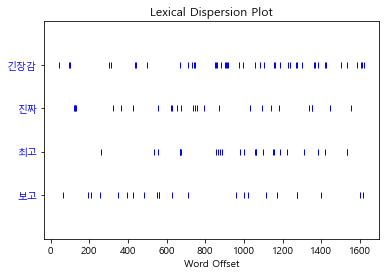

In [107]:
nltk_quiet_place.dispersion_plot(["긴장감", "진짜", "최고", "보고"])

In [108]:
house_mask = np.array(Image.open("house-icon.png"))

data = nltk_quiet_place.vocab().most_common(100)

In [118]:
wc = WordCloud(background_color="white",
               max_words=200,
               mask=house_mask,
               contour_width=3,
               contour_color="steelblue",
               font_path=font_path).generate_from_frequencies(dict(data))

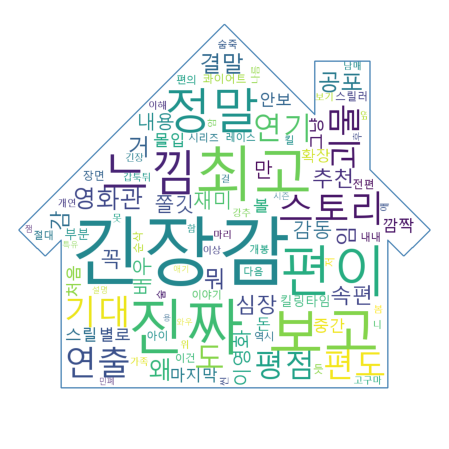

In [119]:
plt.figure(figsize=(12,8))
plt.imshow(wc)
plt.axis("off")
plt.show()

In [131]:
np.array(Image.open("house-icon.png")).shape

(1024, 1024, 4)